In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset  # netcdf4-python module

In [168]:
kernel_data = Dataset('kerner_kernel.nc')
print kernel_data.groups['cell_data']

<type 'netCDF4.Group'>
group /cell_data:
    dimensions(sizes): 
    variables(dimensions): float32 kernel(kernel_2,Elements), float32 error(error_2,Elements), float32 model(model_2,Elements), float32 niterations(niterations_2,Elements), float32 computation_time(computation_time_2,Elements), float32 element_proc(element_proc_2,Elements)
    groups: 



In [169]:
computation_time = kernel_data.groups['cell_data'].variables['computation_time'][:]
iproc_array = kernel_data.groups['cell_data'].variables['element_proc'][:]
niterations = np.mean(kernel_data.groups['cell_data'].variables['niterations'][:], axis=0)

order = np.argsort(niterations)

t = computation_time[0][order][::-1]
iproc_order = iproc_array[0][order][::-1]
niterations_order = niterations[order][::-1]


## Plot time over niterations

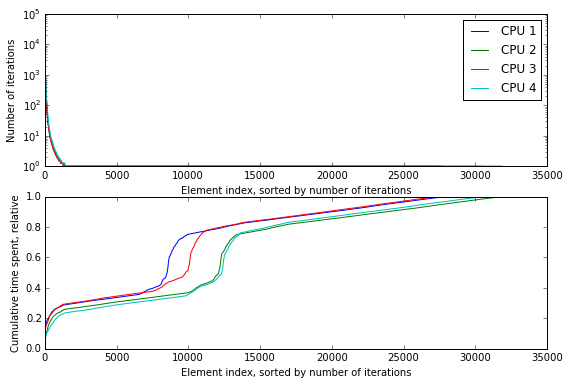

In [170]:

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth (9)

ax = fig.add_subplot(2, 1, 2)
ax.set_ylabel('Cumulative time spent, relative')
ax.set_xlabel('Element index, sorted by number of iterations')
for iproc in range(1,5):
    ax.plot(t[iproc_order==iproc].cumsum()/np.sum(t[iproc_order==iproc]), label='CPU %d'%iproc)
#ax.set_xscale('log')
#ax.axvline(25000*0.001)
#ax.axvline(25000*0.01)
#ax.axvline(25000*0.1)
#ax.axvline(25000*0.5)

ax = fig.add_subplot(2, 1, 1)
ax.set_ylabel('Number of iterations')
ax.set_xlabel('Element index, sorted by number of iterations')
for iproc in range(1,5):
    ax.plot(niterations_order[iproc_order==iproc], label='CPU %d'%iproc)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc=1)

#ax.axvline(25000*0.001)
#plt.text(25000*0.001, 1, ' 0.1%')
#
#plt.axvline(25000*0.01)
#plt.text(25000*0.01, 1, ' 1%')
#
#plt.axvline(25000*0.1)
#plt.text(25000*0.1, 1, ' 10%')
#
#plt.axvline(25000*0.50)
#plt.text(25000*0.5, 1, ' 50%')

fig.show()

## Plot time in calculation order

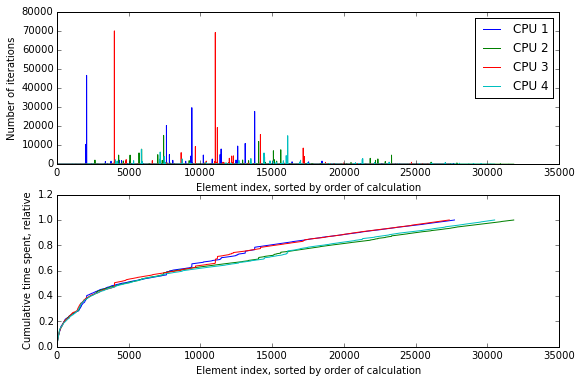

In [171]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth (9)

ax = fig.add_subplot(2, 1, 2)
ax.set_ylabel('Cumulative time spent, relative')
ax.set_xlabel('Element index, sorted by order of calculation')
#ax.plot(computation_time.cumsum()/np.sum(t) , label='CPU %d'%iproc)
for iproc in range(1,5):
    ax.plot(computation_time[iproc_array==iproc].cumsum()/np.sum(t[iproc_order==iproc]) , label='CPU %d'%iproc)

ax = fig.add_subplot(2, 1, 1)
ax.set_ylabel('Number of iterations')
ax.set_xlabel('Element index, sorted by order of calculation')
#ax.plot(computation_time.cumsum()/np.sum(t) , label='CPU %d'%iproc)
for iproc in range(1,5):
    ax.plot(niterations[(iproc_array==iproc)[0]], label='CPU %d'%iproc)
ax.legend(loc=1)    

fig.show()